In [1]:
function [X_train, y_train, X_test, y_test] = split_data(X, y, training_ratio)
    training_set_size = floor(rows(X) * training_ratio);
    
    X_train = X(1:training_set_size, :);
    y_train = y(1:training_set_size, :);

    X_test = X(training_set_size:end, :);
    y_test = y(training_set_size:end, :);
    return
endfunction



In [2]:
function new_theta = SGD(X_train, y_train, theta, lambda, cost_function, alpha, iter=1)
    for _ = 1:iter
        i = unidrnd(rows(X_train));
        x = X_train(i, :);
        y = y_train(i);
        [cost, gradients] = cost_function(x, y, theta, lambda);
        theta = theta - alpha * gradients;
        new_cost = cost_function(x, y, theta, lambda);
        assert(new_cost < cost)
    endfor
    new_theta = theta;
    return
endfunction

In [3]:
wine_data = dlmread("data/wine.data");
columns(wine_data)
rows(wine_data)

rand("seed", 0)
for row = 1:rows(wine_data)
    other = unidrnd(rows(wine_data));
    wine_data([row other], :) = wine_data([other row], :);
endfor

cultivar = wine_data(:, 1);
predictors = wine_data(:, 2:end);
X_std = (predictors .- mean(predictors)) ./ std(predictors);

ans =  14
ans =  178


In [4]:
function s = sigmoid(z)
    s = 1 ./ (1 + e.^-z);
endfunction

% X is a horizontal vector of size N-1 and the independent variable.
% theta is a matrix of size M by N and the model.
% y_actual is a vector of size M and the actual value at X.
% lambda is a number and the regularization parameter.
function [cost, gradients] = logreg_cost(X, y_actual, theta, lambda)
    x = [1 X];
    y = sigmoid(x * theta);
    cost = - y_actual .* (log(y)) - (1-y_actual) .* log(1-y) + lambda * sum(theta .^ 2);
    gradients = x' * (y - y_actual) + lambda * theta;
endfunction

function err = logreg_error(X, y, theta)
    y_ = sigmoid([ones(rows(X), 1) X] * theta);
    err = sum((-y .* log(y_)) - (1-y) .* log(1-y_)) / rows(y);
endfunction

cat =  2
lambda = 0
alpha =  0.0010000
batches =  100


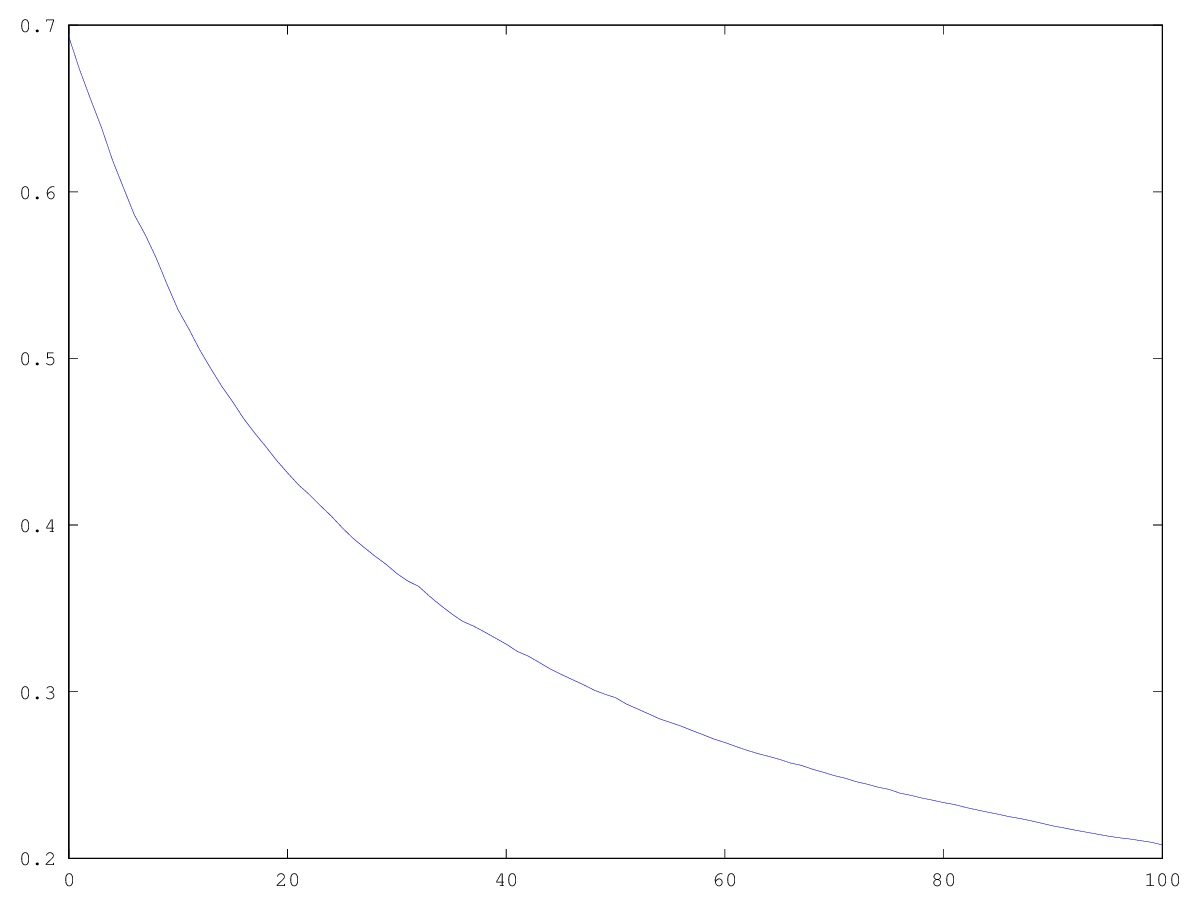

In [5]:
y = zeros(rows(cultivar), 1);
cat = 2
for row = 1:rows(cultivar)
    %y(row, cultivar(row)) = 1;
    if cultivar(row) == cat
        y(row) = 1;
    endif
endfor

[X_train, y_train, X_test, y_test] = split_data(X_std, y, 0.80);

rand("seed", 0)

%theta = unifrnd(-1, 1, columns(X_train) + 1, columns(y_train));
theta = zeros(columns(X_train) + 1, columns(y_train));

rand("seed", 0)
errors = [logreg_error(X_train, y_train, theta)];
lambda = 0
alpha = 0.001
batches = 100
for i = 1:batches
    theta = SGD(X_train, y_train, theta, lambda, @logreg_cost, alpha, 50);
    errors = [errors logreg_error(X_test, y_test, theta)];
endfor

plot(0:batches, errors)

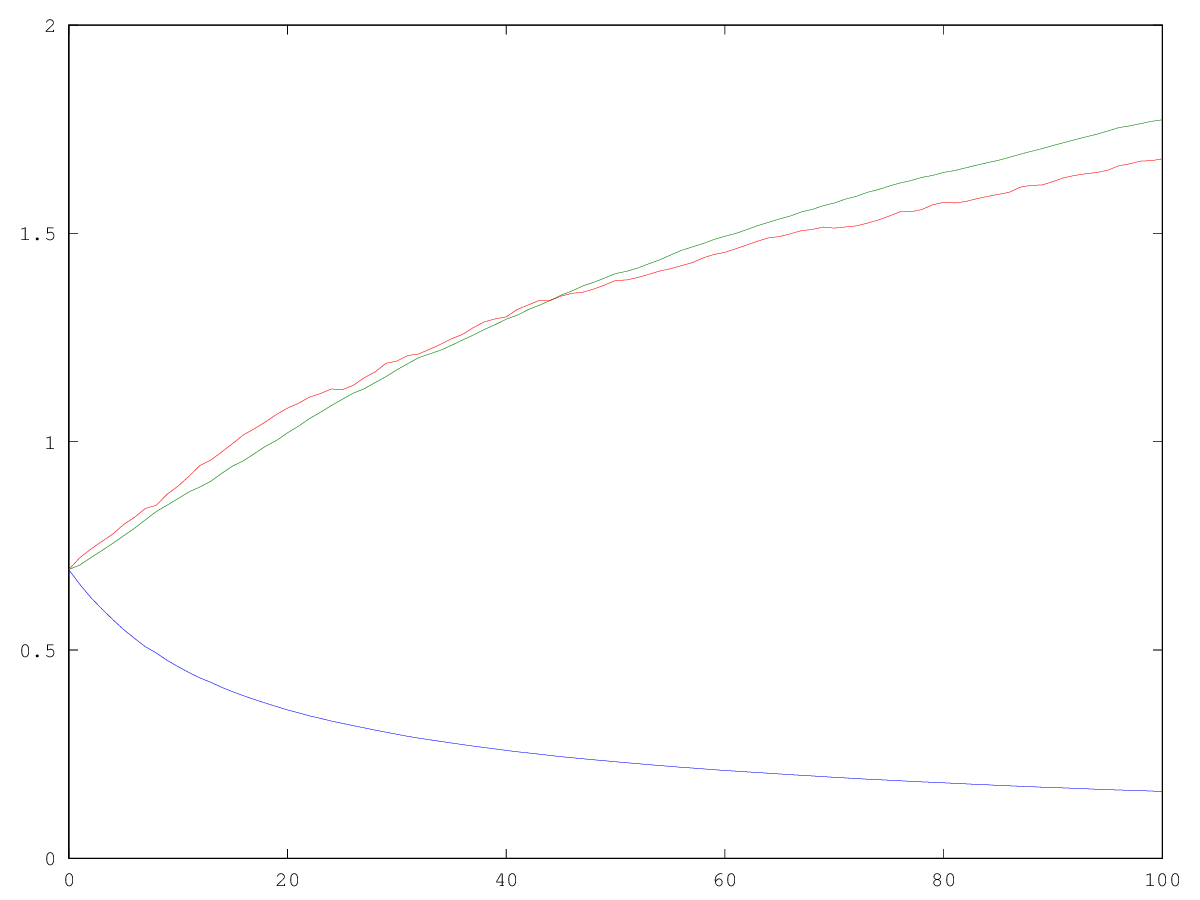

In [6]:
y = zeros(rows(cultivar), 3);

for row = 1:rows(cultivar)
    y(row, cultivar(row)) = 1;
endfor

[X_train, y_train, X_test, y_test] = split_data(X_std, y, 0.80);

rand("seed", 0);

theta2 = zeros(columns(X_train) + 1, columns(y_train));

errors = [logreg_error(X_train, y_train, theta2)];

for i = 1:batches
    theta2 = SGD(X_train, y_train, theta2, lambda, @logreg_cost, alpha, 50);
    errors = [errors; logreg_error(X_train, y_train, theta2)];
endfor

plot(0:batches, errors(:, 1), 0:batches, errors(:, 2), 0:batches, errors(:, 3))